In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.datasets import make_classification

In [17]:
x , y = make_classification(n_samples=1000 ,
                            n_features=2 ,
                            n_classes= 2 ,
                            n_clusters_per_class=2,
                            n_redundant=0 )

In [18]:
x,y

(array([[-1.59435576,  0.21771287],
        [-0.87208287,  0.80474557],
        [-0.55537929, -1.59346941],
        ...,
        [-1.09925152, -2.06045237],
        [-2.11672147, -0.14300312],
        [-0.59367951, -2.06920892]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 

In [19]:
pd.DataFrame(x)[0]

0     -1.594356
1     -0.872083
2     -0.555379
3     -0.467570
4      0.853091
         ...   
995    0.728247
996   -0.642878
997   -1.099252
998   -2.116721
999   -0.593680
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

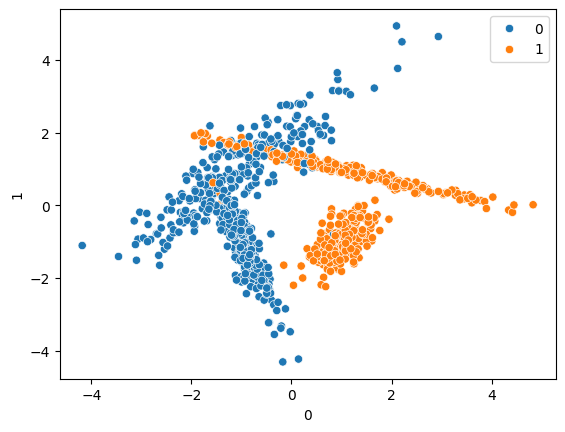

In [20]:
# plot the data
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [25]:
#train the data on the support vector classifier
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [26]:
svc.score(x_test,y_test)

0.865

In [27]:
svc.coef_

array([[1.43717809, 0.03169602]])

In [28]:
# predict
y_pred = svc.predict(x_test)

In [29]:
# check the metrics and the accuracy score of the model
from sklearn.metrics import confusion_matrix , classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[84, 13],
       [14, 89]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        97
           1       0.87      0.86      0.87       103

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



In [33]:
# now check with another kernel
rbf = svc = SVC(kernel='rbf')
rbf.fit(x_train,y_train)

SVC()

In [34]:
y_pred1 = rbf.predict(x_test)

In [35]:
print(y_pred1)

[0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0]


In [36]:
# now calculate the confusion matrix and the classification report
confusion_matrix(y_test,y_pred1)

array([[95,  2],
       [13, 90]])

In [37]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        97
           1       0.98      0.87      0.92       103

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [41]:
# This performs better than the linear kernel
# cheking with the poly kernee
polynomial=SVC(kernel='poly')
polynomial.fit(x_train,y_train)
## Prediction
y_pred2=polynomial.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        97
           1       0.91      0.83      0.87       103

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

[[89  8]
 [18 85]]


In [42]:
polynomial=SVC(kernel='sigmoid')
polynomial.fit(x_train,y_train)
## Prediction
y_pred2=polynomial.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        97
           1       0.85      0.83      0.84       103

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

[[82 15]
 [18 85]]


In [44]:
# Hyper parametertunisg with the support vector classifier
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
grid.best_params_
{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
## Prediction
y_pred4=grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        97
           1       0.95      1.00      0.98       103

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

[[ 92   5]
 [  0 103]]
